<a href="https://colab.research.google.com/github/A-Alexandrov2021/Projects/blob/main/Final_Assignment_Library_new_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [35]:
!pip install yfinance
!pip install pandas

In [97]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [37]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [38]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.3676653,
 'SandP52WeekChange': 0.36123884,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 156.72,
 'askSize': 3000,
 'averageDailyVolume10Day': 77329540,
 'averageVolume': 76831781,
 'averageVolume10days': 77329540,
 'beta': 1.201965,
 'beta3Year': None,
 'bid': 156.71,
 'bidSize': 1300,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 156.69,
 'currentRatio': 1.062,
 'dateShortInterest': 1628812800,
 'dayHigh': 157.26,
 'dayLow': 154.39,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.0057,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 23.657,
 'enterpriseToRevenue': 7.56,
 'enterpriseValue': 2624399605760,
 'exDividendDate': 1628208000,
 'exchange':

We can get the <code>'country'</code> using the key country


In [39]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [40]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [41]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [42]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


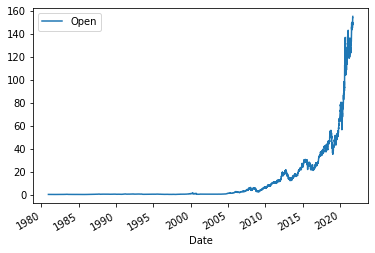

In [43]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [44]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

We can plot the dividends overtime:


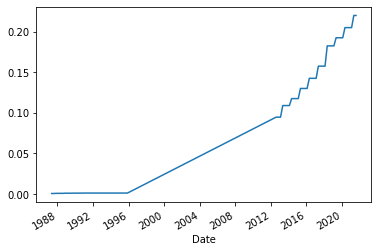

In [45]:
apple.dividends.plot()

## Exercise


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [57]:
amd = yf.Ticker("AMD")
apple_info=apple.info
apple_info

{'52WeekChange': 0.3676653,
 'SandP52WeekChange': 0.36123884,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 156.72,
 'askSize': 3000,
 'averageDailyVolume10Day': 77329540,
 'averageVolume': 76831781,
 'averageVolume10days': 77329540,
 'beta': 1.201965,
 'beta3Year': None,
 'bid': 156.71,
 'bidSize': 1300,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 156.69,
 'currentRatio': 1.062,
 'dateShortInterest': 1628812800,
 'dayHigh': 157.26,
 'dayLow': 154.39,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.0057,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 23.657,
 'enterpriseToRevenue': 7.56,
 'enterpriseValue': 2624399605760,
 'exDividendDate': 1628208000,
 'exchange':

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [58]:
amd.info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [59]:
amd.info['sector']

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [162]:
amd_share_price_data = amd.history(period="ytd")
amd_share_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,51802600,0,0
2021-01-05,92.099998,93.209999,91.410004,92.769997,34208000,0,0
2021-01-06,91.620003,92.279999,89.459999,90.330002,51911700,0,0
2021-01-07,91.330002,95.510002,91.199997,95.160004,42897200,0,0
2021-01-08,95.980003,96.400002,93.269997,94.580002,39816400,0,0


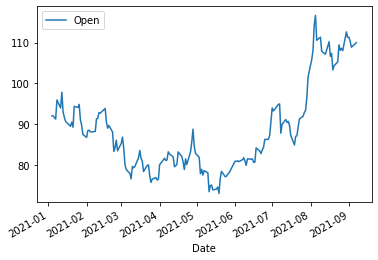

In [160]:
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.plot(x="Date", y="Open")


In [163]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


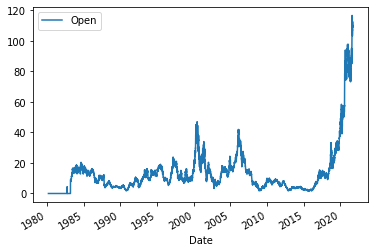

In [164]:
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.plot(x="Date", y="Open")

In [173]:
amd_share_price_data = amd.history(period="2y")
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-09,30.930000,31.180000,30.240000,30.500000,54413200,0,0
2019-09-10,30.219999,30.379999,29.770000,30.230000,48604800,0,0
2019-09-11,30.379999,30.430000,29.510000,29.760000,50631700,0,0
2019-09-12,30.080000,30.840000,29.950001,30.209999,53618300,0,0
2019-09-13,30.270000,30.850000,29.950001,30.690001,47758800,0,0


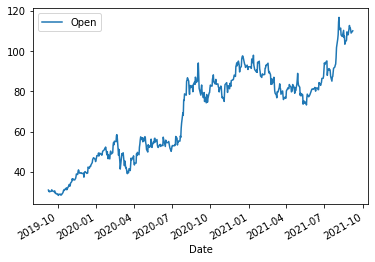

In [174]:
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.plot(x="Date", y="Open")

In [82]:
amd.institutional_holders


,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",97500198,2021-06-29,0.0804,9158193598
1,Blackrock Inc.,85529419,2021-06-29,0.0705,8033778326
2,State Street Corporation,43978929,2021-06-29,0.0363,4130940800
3,Price (T.Rowe) Associates Inc,42699742,2021-06-29,0.0352,4010786766
4,Capital World Investors,41061159,2021-06-29,0.0339,3856874664
5,JP Morgan Chase & Company,34559339,2021-06-29,0.0285,3246158712
6,"FMR, LLC",30750462,2021-06-29,0.0254,2888390895
7,"Wellington Management Group, LLP",24076572,2021-06-29,0.0198,2261512407
8,"Geode Capital Management, LLC",18814414,2021-06-29,0.0155,1767237907
9,Artisan Partners Limited Partnership,12858635,2021-06-29,0.0106,1207811585


In [100]:
amd.institutional_holders
bar_data=amd.institutional_holders.groupby(['Holder'])['Value'].sum().reset_index()
bar_data


,Holder,Value
0,Artisan Partners Limited Partnership,1207811585
1,Blackrock Inc.,8033778326
2,Capital World Investors,3856874664
3,"FMR, LLC",2888390895
4,"Geode Capital Management, LLC",1767237907
5,JP Morgan Chase & Company,3246158712
6,Price (T.Rowe) Associates Inc,4010786766
7,State Street Corporation,4130940800
8,"Vanguard Group, Inc. (The)",9158193598
9,"Wellington Management Group, LLP",2261512407


In [102]:
fig=px.bar(bar_data,x="Holder",y="Value",title='Total number of main institutional Holders')
fig.show()

In [103]:
amd.financials

,2020-12-26,2019-12-28,2018-12-29,2017-12-30
Research Development,1.983e+09,1.547e+09,1.434e+09,1.196e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.28e+09,3.72e+08,3.28e+08,-1.5e+07
Minority Interest,None,None,None,None
Net Income,2.49e+09,3.41e+08,3.37e+08,-3.3e+07
Selling General Administrative,9.95e+08,7.5e+08,5.62e+08,5.16e+08
Gross Profit,4.347e+09,2.868e+09,2.447e+09,1.787e+09
Ebit,1.369e+09,6.31e+08,4.51e+08,1.27e+08
Operating Income,1.369e+09,6.31e+08,4.51e+08,1.27e+08
Other Operating Expenses,NaN,-6e+07,-6e+07,-5.2e+07


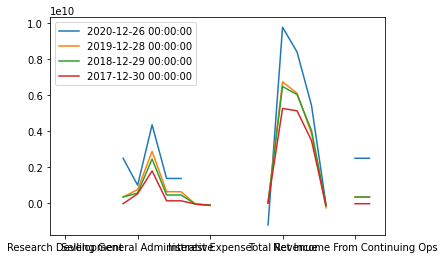

In [90]:
amd.financials.plot()

In [142]:
amd.quarterly_cashflow

<bound method NDFrame.head of                                             2021-06-26  ...   2020-09-26
Investments                                183000000.0  ... -475000000.0
Change To Liabilities                     -120000000.0  ...  282000000.0
Total Cashflows From Investing Activities  119000000.0  ... -549000000.0
Total Cash From Financing Activities      -211000000.0  ... -269000000.0
Change To Operating Activities              40000000.0  ... -231000000.0
Issuance Of Stock                           49000000.0  ...    3000000.0
Net Income                                 710000000.0  ...  390000000.0
Change In Cash                             860000000.0  ... -479000000.0
Repurchase Of Stock                       -260000000.0  ...  -73000000.0
Total Cash From Operating Activities       952000000.0  ...  339000000.0
Depreciation                               110000000.0  ...   93000000.0
Change To Inventory                       -112000000.0  ...   32000000.0
Change To Account Rec

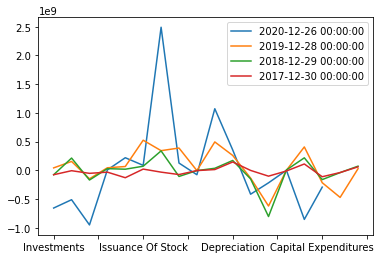

In [93]:
amd.cashflow.plot()

In [105]:
amd.recommendations.head

<bound method NDFrame.head of                                  Firm        To Grade    From Grade Action
Date                                                                      
2012-02-07 09:24:00  Longbow Research            Hold           Buy     up
2012-03-15 06:18:00         Jefferies             Buy                   up
2012-04-17 07:15:00       Sterne Agee             Buy                 main
2012-04-20 06:17:00     Deutsche Bank            Hold                 main
2012-04-20 06:40:00         Citigroup             Buy                 main
...                               ...             ...           ...    ...
2021-07-15 16:00:45         Citigroup         Neutral          Sell     up
2021-07-28 11:17:22        Rosenblatt             Buy                 main
2021-07-28 12:08:31       Susquehanna        Positive                 main
2021-07-28 14:31:37         Benchmark             Buy                 main
2021-08-09 10:08:04       BMO Capital  Market Perform  Underperform   

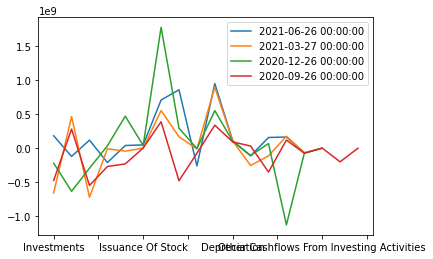

In [155]:
amd.quarterly_cashflow.plot()


In [156]:
bar_data=amd.recommendations.groupby(['Firm'])['To Grade'].sum().reset_index()
bar_data

,Firm,To Grade
0,Argus,BuyBuy
1,Argus Research,Buy
2,Ascendiant Capital,BuyHold
3,Atlantic Equities,NeutralOverweight
4,B of A Securities,BuyBuyBuyBuyBuyBuy
5,BMO Capital,OutperformMarket PerformMarket PerformUnderper...
6,Baird,OutperformNeutralNeutral
7,Bank of America,BuyNeutralUnderperformBuyBuy
8,Barclays,Equal-WeightEqual-WeightUnderweightUnderweight...
9,Benchmark,HoldBuy


In [157]:
bar_data['Firm']=bar_data['Firm'].fillna(0)

In [158]:
fig = px.sunburst(bar_data, path=['Firm', 'Value'], values='Flights')
fig.show()

TypeError: ignored

In [197]:
ibm = yf.Ticker("IBM")


In [198]:
print(ibm.info)

{'zip': '10504', 'sector': 'Technology', 'fullTimeEmployees': 345900, 'longBusinessSummary': "International Business Machines Corporation provides integrated solutions and services worldwide. Its Cloud & Cognitive Software segment offers software for vertical and domain-specific solutions in various application areas; and customer information control system and storage, and analytics and integration software solutions to support client mission on-premise workloads in banking, airline, and retail industries. It also offers middleware and data platform software, including Red Hat that enables the operation of clients' hybrid multi-cloud environments; and Cloud Paks, WebSphere distributed, and analytics platform software, such as DB2 distributed, information integration, and enterprise content management, as well as IoT, Blockchain and AI/Watson platforms. The company's Global Business Services segment offers business consulting services; system integration, application management, mainte

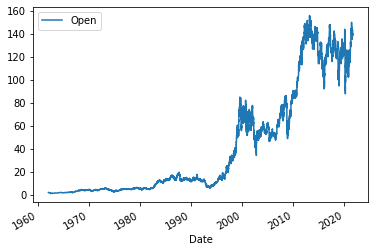

In [199]:
history = ibm.history(period="max")
history.reset_index(inplace=True)
history.plot(x="Date", y="Open")

In [200]:
ibm.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",74774326,2021-06-29,0.0834,10961168448
1,Blackrock Inc.,63805232,2021-06-29,0.0712,9353208958
2,State Street Corporation,51879965,2021-06-29,0.0579,7605084069
3,"Geode Capital Management, LLC",14364580,2021-06-29,0.0160,2105703782
4,"Charles Schwab Investment Management, Inc.",13446039,2021-06-29,0.0150,1971054857
5,Morgan Stanley,12036449,2021-06-29,0.0134,1764423058
6,Northern Trust Corporation,10403952,2021-06-29,0.0116,1525115323
7,Norges Bank Investment Management,8865649,2020-12-30,0.0099,1116007896
8,Bank Of New York Mellon Corporation,8777355,2021-06-29,0.0098,1286672469
9,Bank of America Corporation,8365555,2021-06-29,0.0093,1226306707


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
